# EDA ASSIGNMENT

### a. Data Cleaning 
* Implement techniques to handle missing values and outliers on a dataset. 
* Submit a Jupyter Notebook with code and explanations.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [77]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [78]:
titanic.shape

(891, 15)

In [79]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [80]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Handling Missing Values

In [81]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [82]:
titanic['deck'].unique() # over 60% is missing

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [83]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [84]:
titanic.drop(columns=['deck'], inplace=True)
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [85]:
titanic['age']=titanic['age'].fillna(titanic['age'].mean())

In [86]:
titanic['embarked']=titanic['embarked'].fillna(titanic['embarked'].mode()[0])

In [87]:
titanic['embark_town']=titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

In [88]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### Handling Outliers

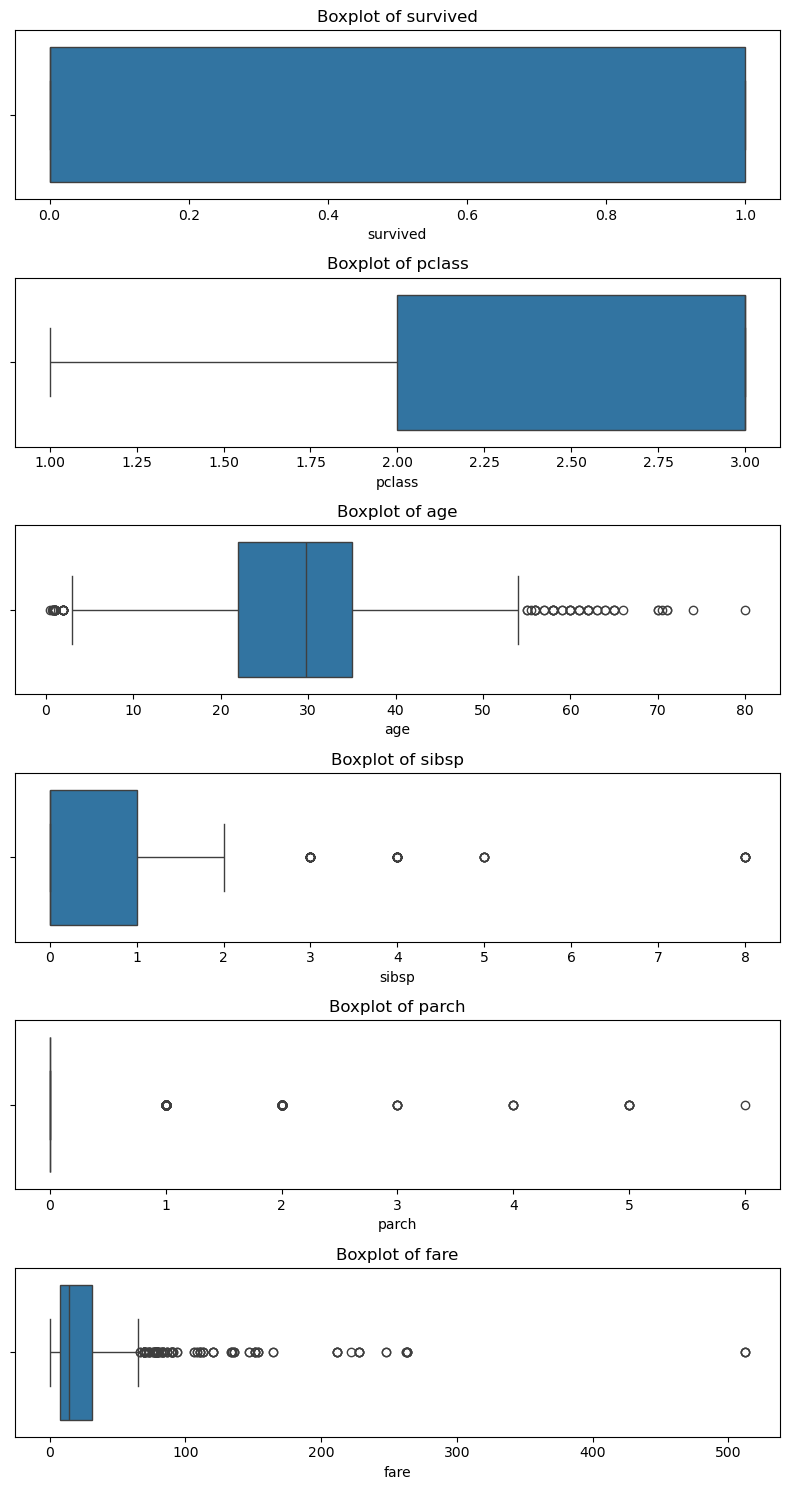

In [89]:
numerical_features = titanic.select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows = len(numerical_features.columns), ncols=1, figsize=(8, 15))

for ax, column in zip(axes, numerical_features.columns):
    sns.boxplot(x=titanic[column], ax=ax)
    ax.set_title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [90]:
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median
median_age = titanic['age'].median()
titanic['age'] = np.where((titanic['age'] < lower_bound) | (titanic['age'] > upper_bound), median_age, titanic['age'])

In [91]:
titanic['fare'] = np.log1p(titanic['fare'])  # log(1 + x) to handle zero values

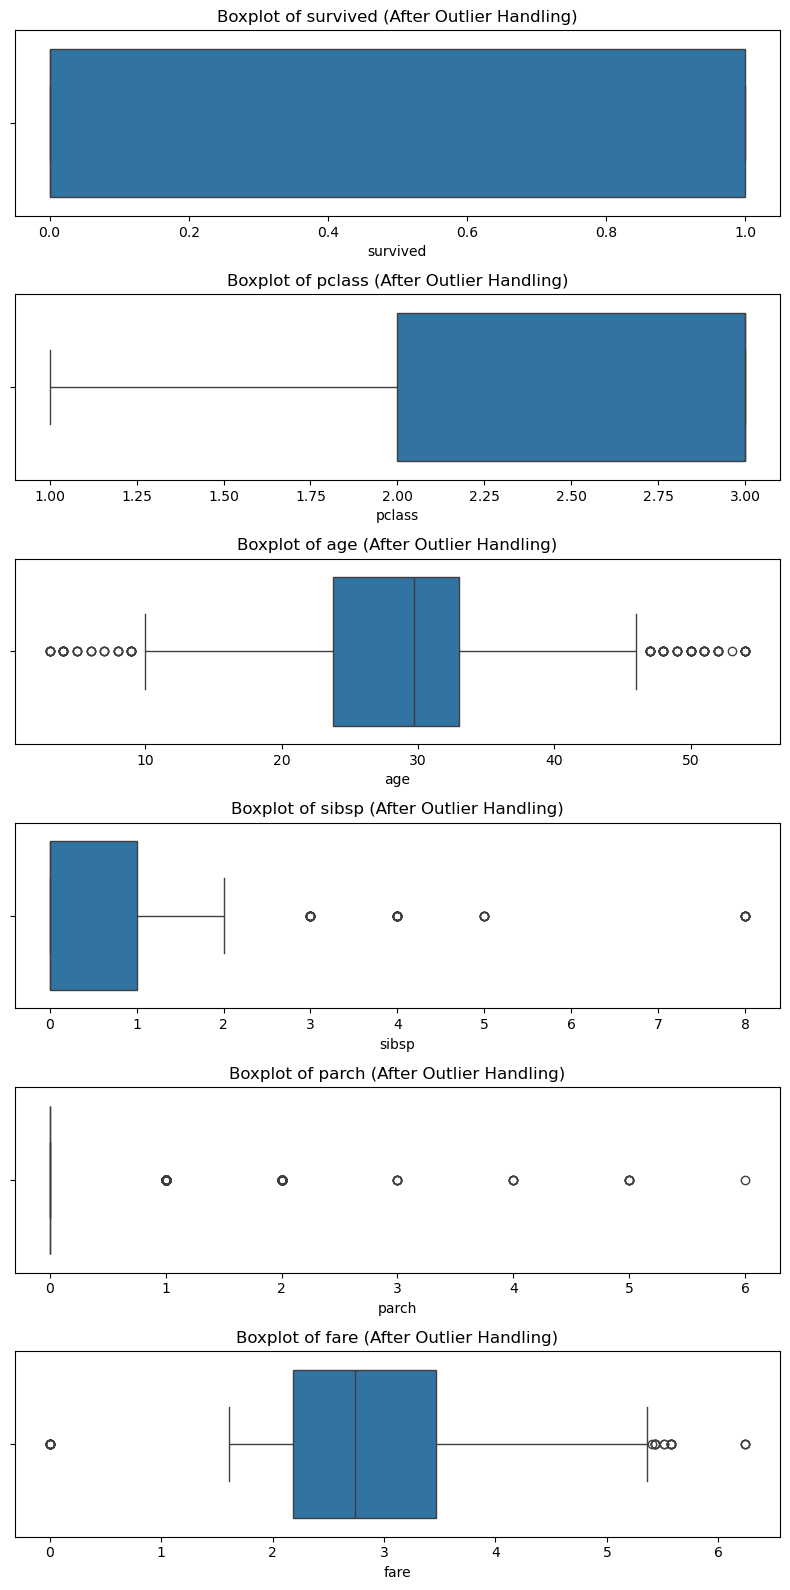

In [92]:
fig, axes = plt.subplots(nrows=len(numerical_features.columns), ncols=1, figsize=(8, 16))

for i, col in enumerate(numerical_features.columns):
    sns.boxplot(x=titanic[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} (After Outlier Handling)')

plt.tight_layout()
plt.show()

### b. Feature Engineering and Selection 
* Perform feature engineering and selection on a dataset. 
* Submit a Jupyter Notebook with code and explanations. 


#### Feature Engineering

Create new meaningful features

In [93]:
# 1. FamilySize - combining SibSp and Parch to represent total family members.

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 

In [94]:
# 3. FarePerPerson - Adjusting Fare by family size.
titanic['fare_per_person'] = titanic['fare'] / titanic['family_size']

In [95]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,fare_per_person
0,0,3,male,22.0,1,0,2.110213,S,Third,man,True,Southampton,no,False,2,1.055107
1,1,1,female,38.0,1,0,4.280593,C,First,woman,False,Cherbourg,yes,False,2,2.140297
2,1,3,female,26.0,0,0,2.188856,S,Third,woman,False,Southampton,yes,True,1,2.188856
3,1,1,female,35.0,1,0,3.990834,S,First,woman,False,Southampton,yes,False,2,1.995417
4,0,3,male,35.0,0,0,2.202765,S,Third,man,True,Southampton,no,True,1,2.202765


#### Data transforming

In [96]:
titanic['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [97]:
titanic['age_group'] = pd.cut(
    titanic['age'], bins=[0, 12, 18, 40, 60, 100], 
    labels=['child', 'teen', 'adult', 'middle_aged', 'senior']
)
titanic = pd.get_dummies(titanic, columns=['age_group'], drop_first=True)

In [98]:
titanic['fare_group'] = pd.qcut(titanic['fare'], q=4, labels=['low', 'medium', 'high', 'very_high'])
titanic = pd.get_dummies(titanic, columns=['fare_group'], drop_first=True)

In [99]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alone,family_size,fare_per_person,age_group_teen,age_group_adult,age_group_middle_aged,age_group_senior,fare_group_medium,fare_group_high,fare_group_very_high
0,0,3,male,22.0,1,0,2.110213,S,Third,man,...,False,2,1.055107,False,True,False,False,False,False,False
1,1,1,female,38.0,1,0,4.280593,C,First,woman,...,False,2,2.140297,False,True,False,False,False,False,True
2,1,3,female,26.0,0,0,2.188856,S,Third,woman,...,True,1,2.188856,False,True,False,False,True,False,False
3,1,1,female,35.0,1,0,3.990834,S,First,woman,...,False,2,1.995417,False,True,False,False,False,False,True
4,0,3,male,35.0,0,0,2.202765,S,Third,man,...,True,1,2.202765,False,True,False,False,True,False,False


### c. EDA 
* Conduct EDA on a dataset. 
* Create visualizations, calculate summary statistics, and analyze correlations and covariances. 
* Submit a Jupyter Notebook with findings and visualizations.


In [101]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   survived               891 non-null    int64   
 1   pclass                 891 non-null    int64   
 2   sex                    891 non-null    object  
 3   age                    891 non-null    float64 
 4   sibsp                  891 non-null    int64   
 5   parch                  891 non-null    int64   
 6   fare                   891 non-null    float64 
 7   embarked               891 non-null    object  
 8   class                  891 non-null    category
 9   who                    891 non-null    object  
 10  adult_male             891 non-null    bool    
 11  embark_town            891 non-null    object  
 12  alive                  891 non-null    object  
 13  alone                  891 non-null    bool    
 14  family_size            891 non-null    int

In [102]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,family_size,fare_per_person
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.940388,0.523008,0.381594,2.962246,1.904602,2.076164
std,0.486592,0.836071,9.800230,1.102743,0.806057,0.969048,1.613459,0.989788
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,23.750000,0.000000,0.000000,2.187218,1.000000,1.401680
50%,0.000000,3.000000,29.699118,0.000000,0.000000,2.737881,1.000000,2.169054
75%,1.000000,3.000000,33.000000,1.000000,0.000000,3.465736,2.000000,2.442347
max,1.000000,3.000000,54.000000,8.000000,6.000000,6.240917,11.000000,6.240917


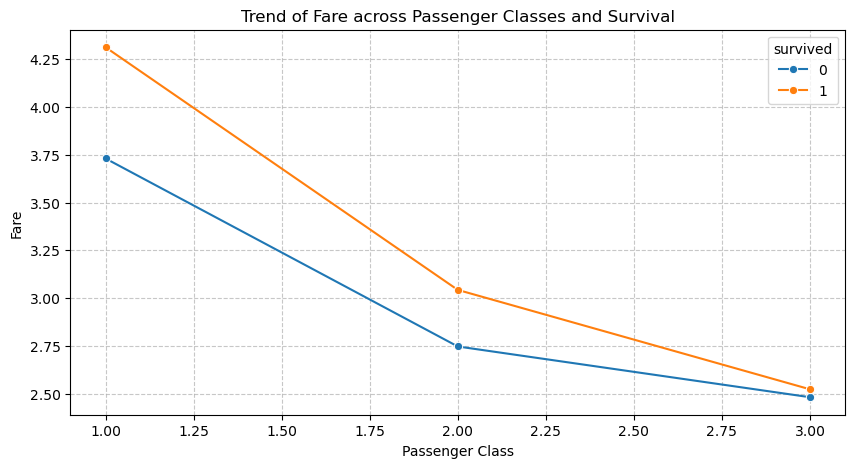

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='pclass', y='fare', hue='survived', data=titanic, marker='o', errorbar=None)
plt.title('Trend of Fare across Passenger Classes and Survival')
plt.xlabel('Passenger Class')

plt.ylabel('Fare')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* 1st-class passengers paid higher fares than 2nd and 3rd-class passengers.
* Survivors paid higher fares on average (possibly wealthier passengers had better survival chances).

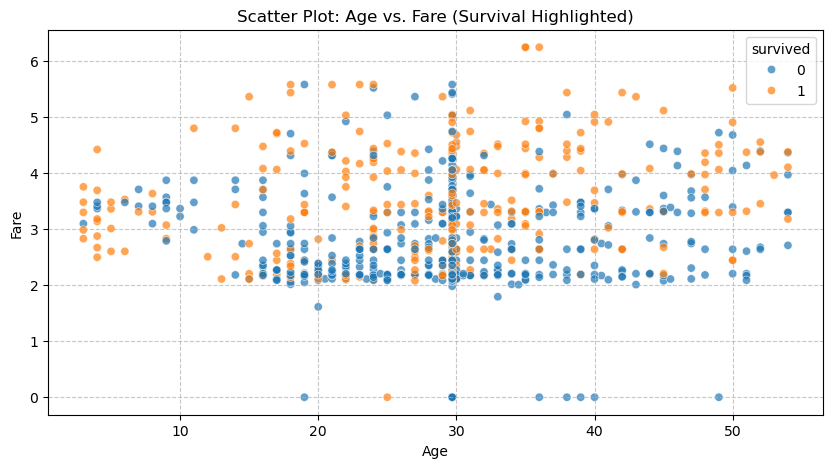

In [108]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic, alpha=0.7)
plt.title('Scatter Plot: Age vs. Fare (Survival Highlighted)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

* Younger passengers (children) had higher survival rates.
* Elderly passengers paid higher fares but didn’t necessarily survive more.

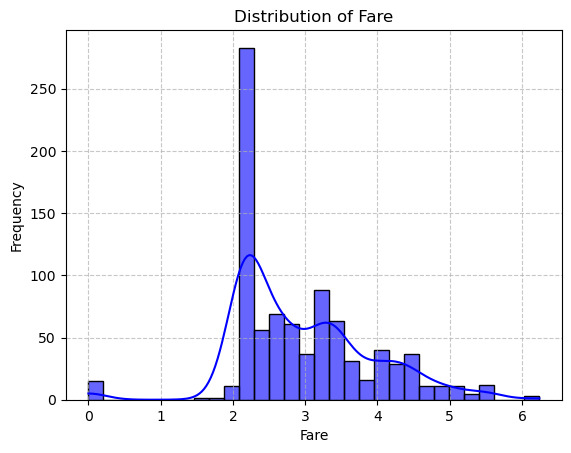

In [109]:
plt.figure(figure=(12, 5))
sns.histplot(titanic['fare'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

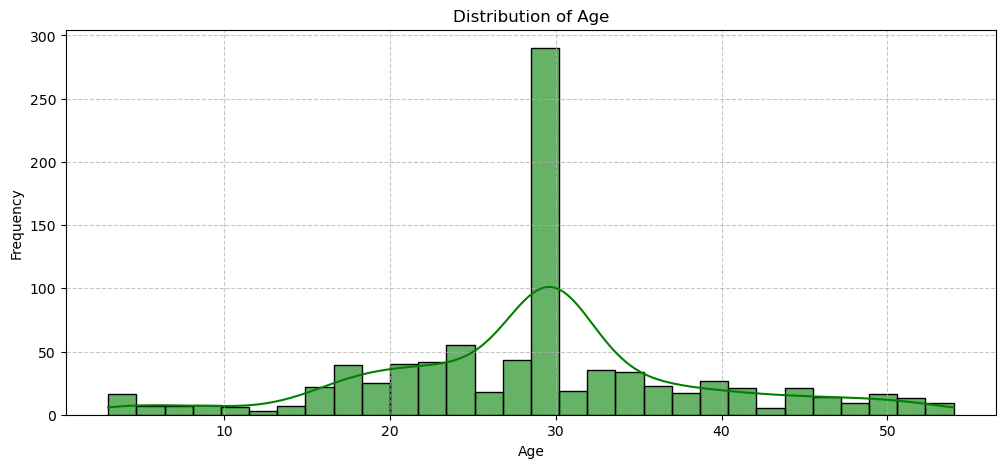

In [110]:
plt.figure(figsize=(12, 5))
sns.histplot(titanic['age'], bins=30, kde=True, color='green', alpha=0.6)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

* Fare is right-skewed (a few passengers paid very high fares).
* Age follows a normal-like distribution, with most passengers being young adults.

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_37013/3151792440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=titanic, palette='Set2')


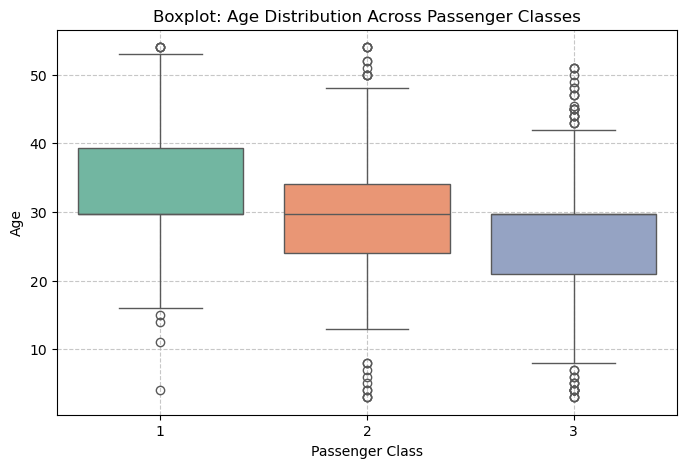

In [111]:
plt.figure(figsize=(8,5))
sns.boxplot(x='pclass', y='age', data=titanic, palette='Set2')
plt.title('Boxplot: Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

* Older passengers were mostly in 1st class.
* 3rd-class had more younger passengers (likely families with kids).
* Outliers indicate some very young and very old passengers in all classes.

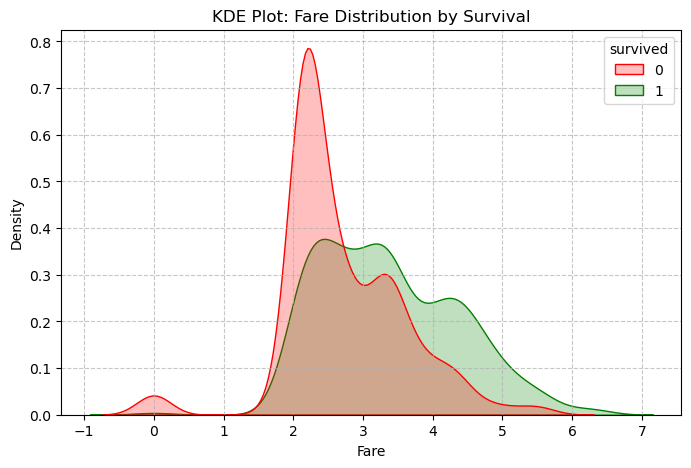

In [120]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='fare', hue='survived', data=titanic, fill=True, common_norm=False, palette=['red', 'green'])
plt.title('KDE Plot: Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

* Survivors had higher fare densities in the upper ranges.
* Many non-survivors paid lower fares.

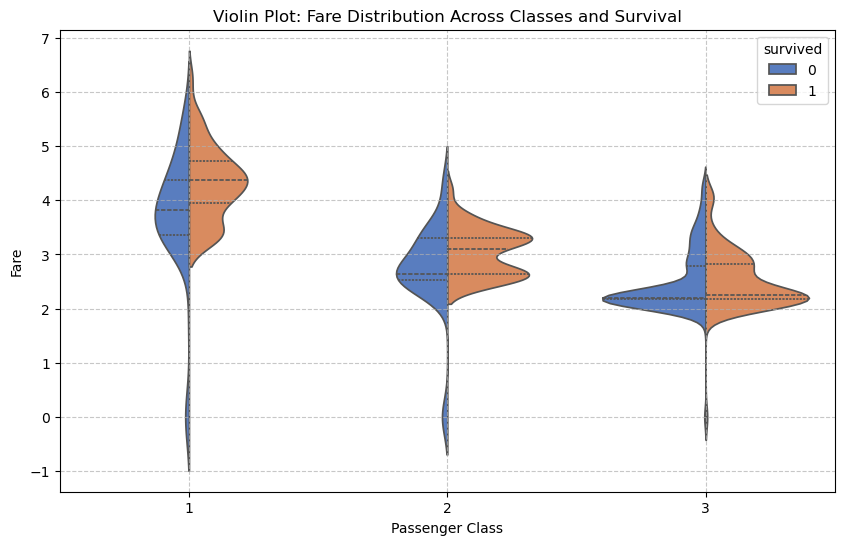

In [121]:
plt.figure(figsize=(10, 6))
sns.violinplot(x= 'pclass', y='fare', hue='survived', data=titanic, split=True, inner='quartile', palette='muted')
plt.title('Violin Plot: Fare Distribution Across Classes and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

* 1st-class survivors had the highest fares.
* 3rd-class fares were lower and survival was less frequent.

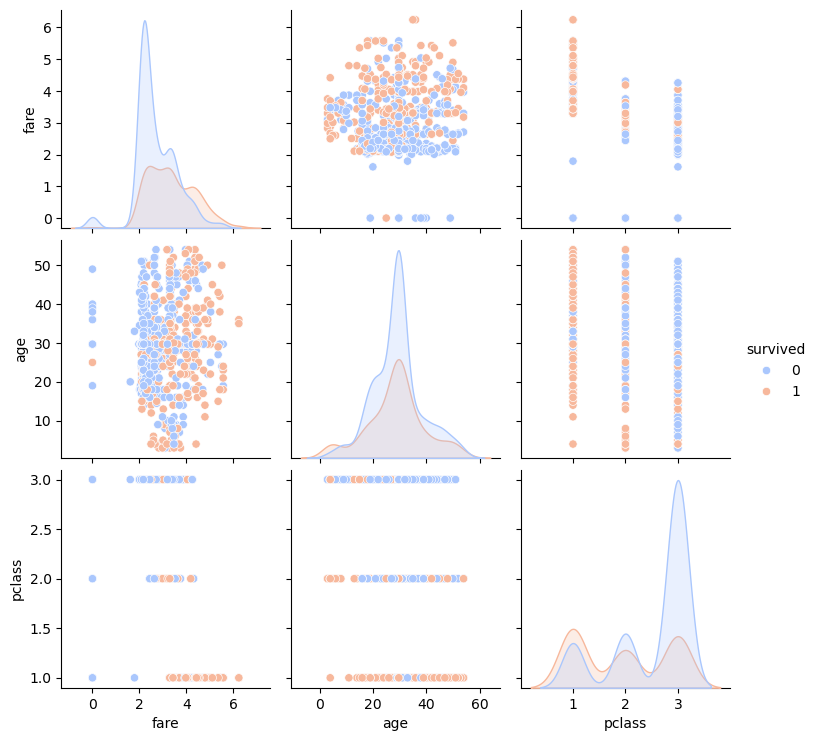

In [126]:
sns.pairplot(titanic[['fare', 'age', 'pclass', 'survived']], hue='survived', palette='coolwarm')

### Summary Statitistics

In [128]:
from scipy import stats

def calculate_summary_statistics(df):
    summary = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        summary[col] = {
            "Mean": np.mean(df[col]),
            "Median": np.median(df[col]),
            "Mode": stats.mode(df[col], keepdims=True)[0][0],
            "Standard Deviation": np.std(df[col], ddof=1),
            "Variance": np.var(df[col], ddof=1),
            "Skewness": stats.skew(df[col]),
            "Kurtosis": stats.kurtosis(df[col]),
        }
    return pd.DataFrame(summary).T

summary_stats = calculate_summary_statistics(titanic)
summary_stats

,Mean,Median,Mode,Standard Deviation,Variance,Skewness,Kurtosis
survived,0.383838,0.000000,0.000000,0.486592,0.236772,0.477717,-1.771786
pclass,2.308642,3.000000,3.000000,0.836071,0.699015,-0.629486,-1.279570
age,28.940388,29.699118,29.699118,9.800230,96.044499,0.045315,0.585322
sibsp,0.523008,0.000000,0.000000,1.102743,1.216043,3.689128,17.773512
parch,0.381594,0.000000,0.000000,0.806057,0.649728,2.744487,9.716613
fare,2.962246,2.737881,2.202765,0.969048,0.939055,0.394263,0.963946
family_size,1.904602,1.000000,1.000000,1.613459,2.603248,2.722848,9.101619
fare_per_person,2.076164,2.169054,2.202765,0.989788,0.979680,0.619681,1.206186


### Correlation analysis

In [129]:
numerical_features = titanic.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()

correlation_matrix

,survived,pclass,age,sibsp,parch,fare,family_size,fare_per_person
survived,1.000000,-0.338481,-0.025726,-0.035322,0.081629,0.329862,0.016639,0.101736
pclass,-0.338481,1.000000,-0.274381,0.083081,0.018443,-0.661022,0.065997,-0.409068
age,-0.025726,-0.274381,1.000000,-0.172218,-0.122593,0.097213,-0.178950,0.206521
sibsp,-0.035322,0.083081,-0.172218,1.000000,0.414838,0.318528,0.890712,-0.520345
parch,0.081629,0.018443,-0.122593,0.414838,1.000000,0.332186,0.783111,-0.532932
fare,0.329862,-0.661022,0.097213,0.318528,0.332186,1.000000,0.383658,0.267988
family_size,0.016639,0.065997,-0.178950,0.890712,0.783111,0.383658,1.000000,-0.621882
fare_per_person,0.101736,-0.409068,0.206521,-0.520345,-0.532932,0.267988,-0.621882,1.000000


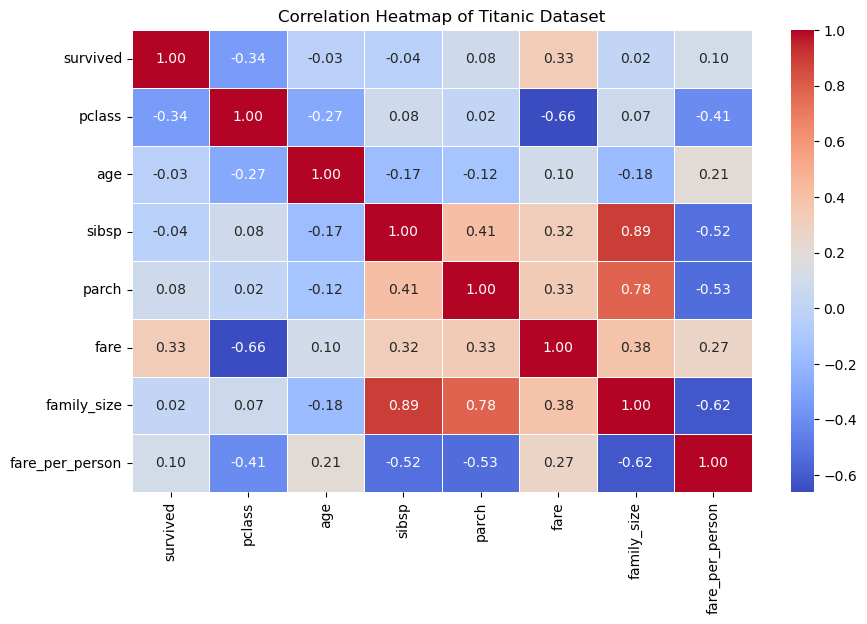

In [131]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

### Covariance Analysis

In [134]:
df = sns.load_dataset('iris')

numerical_features = df.select_dtypes(include=['number'])

covariance_matrix = numerical_features.cov()

covariance_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


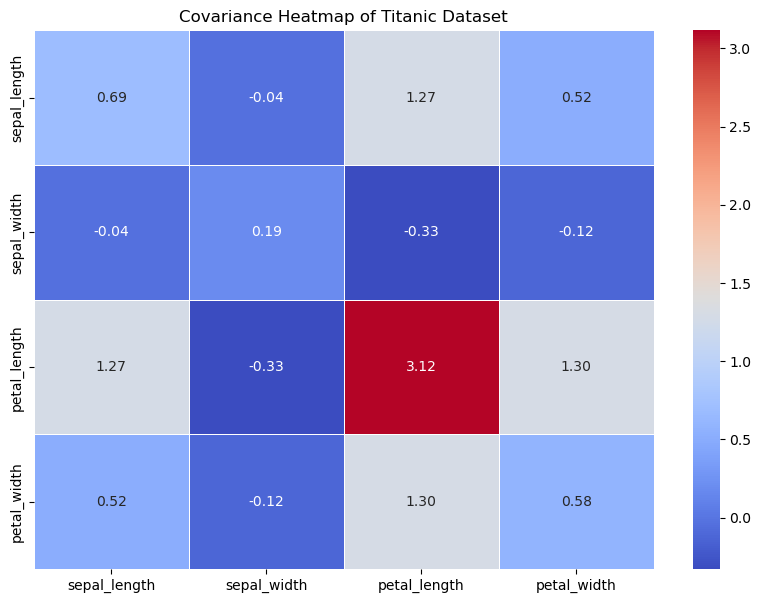

In [135]:
plt.figure(figsize=(10, 7))
sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Covariance Heatmap of Titanic Dataset")
plt.show()